# Metadata

* Title: **Final Project Report**
* Class: DS 5100
* Date: 7/15/22
* Student Name: Rhea Agarwal
* Student Net ID: ra5rc
* This URL: https://github.com/ra5rc/Final-Project/blob/main/FinalProjectSubmission.ipynb
* GitHub Repo URL: https://github.com/ra5rc/MonteCarlo-Project

# The Monte Carlo Module

In [18]:
import pandas as pd
import numpy as np
import random

In [19]:
# A code block with your classes.
class Die():
    """
    A die has N sides, or “faces”, and W "weights",
    stored in a dataframe that can be rolled to select 
    a face. 
  
    Attributes:
    A die object with assigned faces and weights.
    
    Methods:
    __init__
    change_w
    rolldie
    display
   
    """
    _diedf=pd.DataFrame({'faces':[],'weights':[]})
    
    def __init__(self, n, w = 1.0):
        
        """
        Initialize the Die from faces and weights. 
       
        Input Arguments:
        n must be an array of floats, integers or strings.
        w can be an array or value of floats or integers. 
        If no weight is specified, w will default to 1.0.
        """
        self.n=n
        self.w=w
        _newdie = pd.DataFrame({'faces': n, 'weights': w})
        self._diedf = pd.concat([self._diedf, _newdie], ignore_index=True)

    def change_w(self, faces, weights):
        """
        The function to change the weight of a specified face.
  
        Parameters:
           faces, int, float, or string.
           weights, int or float.
           
        Returns:
            Specifies whether face is in array of values already.
            Changes type of weight to floaat if not already.
            Changes weight at specified face value.
            
        """
        if (not (faces in list(self._diedf['faces']))):
            raise ValueError('Face not in die.')
        else:
            self._diedf.at[self._diedf.index[self._diedf.faces == faces],'weights']=float(weights)

    def rolldie(self, number=1):
        """
        The function to roll a die object a number of times according to weight.
        
        Parameters:
        number, int or float
        
        Returns:
        An array of face values chosen randomly a specified number of times.
        """
        roll= random.choices(self._diedf['faces'].values, self._diedf['weights'].values, k=number)
        return(roll)
          
    def display(self):
        """
        The function to display a dataframe of the faces and weights of a die.         
        
        Returns:
        A dataframe with the faces and weights of a die.               
        
        """
        
        return(self._diedf)

In [20]:
class Game():  
    """
    A game object consists of one or more die objects that 
    can be rolled to output a number of faces. 
  
    Attributes:
    A game object with at least one die.
    
    Methods:
    __init__
    play
    show  
  
    """  
    
    def __init__(self, games):
        """
        Initialize a game from die objects. 
       
        Input Arguments:
        Games must be a list of at least one die objects.
        """
        self.games=games
       
    def play(self, ntimes):
        """
        The function to play one or more die a specified amount of times
        
        Parameters:
        ntimes, int or float
        
        Returns:
        Rolls one or more die a specified number of times and stores results into a dataframe. 
        """
           
        rolllist=[]
        for x in range(0, len(self.games)):
            rolllist.append(self.games[x].rolldie(ntimes))
        dienames=[]
        [dienames.append("Die"+str(x) )  for x in range(0, len(self.games))] 
        self._rolldf= pd.DataFrame(rolllist, index = dienames).T
        self._rolldf.index.name ='Roll Number'

   
    def show(self, form='wide'):
        """
        The function to display the outcomes of a game in wide or narrow dataframe. 
        
        Parameters:
        form, as 'wide'(default) or 'narrow', else raises exception. 
        
        Returns:
        A dataframe of game results as wide or narrow otherwise raises exception. 
        """
        if form == 'narrow':
            return(self._rolldf.unstack().to_frame().rename_axis(index=["Die Number", "Roll Number"]))
                           
        elif form =='wide':
            return(self._rolldf)
        
        elif (form != 'wide') or (form != 'narrow'):
            raise Exception('Form not accepted. Continue with wide or narrow.')
            

In [21]:
class Analyzer():
    """
    An Analyzer object consists of one or more game 
    objects with a results dataframe and can compute statistical 
    properties. 
  
    Attributes:
    A analyze object with a specified game. 
    
    Methods:
    __init__
    jackpot
    combo
    facecount
  
    """ 
    def __init__(self, gameobj):
        """
        Initialize the Analyzer object from a game. 
       
        Input Arguments:
        Gameobj must be a game with at least one die 
        that has been played.
    
        """
        self.gameobj=gameobj
        self.gameobjdf = self.gameobj.show()

    def jackpot(self):
        """
        The function checks each roll for the same face 
        outputted and counts the number of rolls where the 
        face values are all equal.
        
        Returns:
        The length of a dataframe of jackpot rows as an integer.
        """
        
        self.jackresultdf=self.gameobjdf[self.gameobjdf.nunique(axis=1).eq(1)]
        return(len(self.jackresultdf))
    
    def combo(self):
        """
        The function computes the number of times each unique combination of faces rolled occurs.
        
        Returns:
        A dataframe of each unique combination of faces rolled totaled.
        """
        self.uni= (self.gameobjdf.value_counts()).to_frame().rename(columns={0: "Counts"}, level = 0)        #.rename_axis(index=["Die Number", "Count"])
        return(self.uni)
    
    def facecount(self):
        """
        The function counts the number of times every face appears in each roll.
        
        Returns:
        A dataframe of each face totaled for every roll. 
        
        """
        return(self.gameobjdf.apply(pd.Series.value_counts, axis=1).fillna(0))

In [22]:
# Demo Code
die1=Die([4,2,5])
die2=Die([3,4,5])

die1.change_w(2,3)
print(die1.display())
die2.rolldie(5)
print(die2.display())

game1=Game([die1,die2])
game1.play(10)
print(game1.show())

analyze1=Analyzer(game1)
print(analyze1.jackpot())
print(analyze1.combo())
print(analyze1.facecount())

   faces  weights
0    4.0      1.0
1    2.0      3.0
2    5.0      1.0
   faces  weights
0    3.0      1.0
1    4.0      1.0
2    5.0      1.0
             Die0  Die1
Roll Number            
0             4.0   3.0
1             4.0   3.0
2             5.0   5.0
3             5.0   5.0
4             2.0   5.0
5             2.0   5.0
6             4.0   5.0
7             2.0   5.0
8             2.0   5.0
9             2.0   5.0
2
           Counts
Die0 Die1        
2.0  5.0        5
4.0  3.0        2
5.0  5.0        2
4.0  5.0        1
             2.0  3.0  4.0  5.0
Roll Number                    
0            0.0  1.0  1.0  0.0
1            0.0  1.0  1.0  0.0
2            0.0  0.0  0.0  2.0
3            0.0  0.0  0.0  2.0
4            1.0  0.0  0.0  1.0
5            1.0  0.0  0.0  1.0
6            0.0  0.0  1.0  1.0
7            1.0  0.0  0.0  1.0
8            1.0  0.0  0.0  1.0
9            1.0  0.0  0.0  1.0


# Test Module

In [23]:
import unittest
from Demo.dieclass import Die
from Demo.gameclass import Game
from Demo.analyzerclass import Analyzer

class ProjectTestSuite(unittest.TestCase):
    
    def test_1_change_w(self):
        """
        Tests change_w method
        """
        test_object=Die([1,2,3,4,4])
        test_object.change_w(4, 0.8)
        self.assertTrue(((test_object._diedf['faces'] == 4) & ((test_object._diedf['weights']== 0.8))).any())
                        
    def test_2_rolldice(self):
        """
        Tests rolldice method
        """
        test_object=Die([1,2,3,4,4])
        test_object.rolldie(5)
        self.assertTrue(len(test_object.rolldie(5)) == 5)
        
    def test_3_display(self):
        """
        Tests display method
        """
        test_object=Die([1,2,3,4,4])
        test_object.display()
        self.assertTrue(test_object._diedf.shape[0] != 0)
        
    def test_4_play(self):
        """
        Tests play method
        """
        die1=Die([2,3,4])
        die2=Die([1,2,3])
        test_object=Game([die1,die2])
        test_object.play(22)
        self.assertTrue(len(test_object._rolldf) == 22)
    
    def test_5_show(self):
        """
        Tests show method with form as wide
        """
        die1=Die([2,3,4])
        die2=Die([1,2,3])
        test_object=Game([die1,die2])
        test_object.play(22)
        test_object.show()
        self.assertTrue(test_object._rolldf.shape == (22,2))
        
        
    def test_6_show(self):
        """
        Tests show method with form as narrow
        """
        die1=Die([2,3,4])
        die2=Die([1,2,3])
        test_object=Game([die1,die2])
        test_object.play(22)
        x1 = test_object.show(form = 'narrow')
        self.assertEqual((len(x1)) ,44)
     
    
    def test_7_show(self):
        """
        Tests show method exception raised from incorrect input for form argument. 
        """
        die1=Die([2,3,4])
        die2=Die([1,2,3])
        test_object=Game([die1,die2])
        test_object.play(22)     
        with self.assertRaises(Exception):
            test_object.show(form = 'b')
        
    def test_8_jackpot(self):
        """
        Tests jackpot method
        """
        die1=Die([3,3,3])
        die2=Die([1,3,3])
        game1=Game([die1,die2])
        game1.play(10)
        test_object=Analyzer(game1)
        test_object.jackpot()
        self.assertTrue(len(game1._rolldf) > len(test_object.jackresultdf))
        
    def test_9_combo(self):
        """
        Tests combo method
        """
        die1=Die([3,3,3])
        die2=Die([2,2,2])
        game1=Game([die1,die2])
        game1.play(10)
        test_object=Analyzer(game1)
        test_object.combo()
        self.assertTrue((test_object.uni['Counts']==10).all())
        
        
    def test_10_facecount(self):
        """
        Tests facecount method
        """
        die1=Die([3,3,3])
        die2=Die([2,2,2])
        game1=Game([die1,die2])
        game1.play(1)
        test_object=Analyzer(game1)
        self.assertTrue((test_object.facecount().iloc[0] == 1).all())      

        
if __name__ == '__main__':
    unittest.main(verbosity=2)


C:\Users\Rhea\AppData\Roaming\jupyter\runtime\kernel-622add02-1a2e-4a05-a1a2-d97e6f83348c (unittest.loader._FailedTest) ... ERROR

ERROR: C:\Users\Rhea\AppData\Roaming\jupyter\runtime\kernel-622add02-1a2e-4a05-a1a2-d97e6f83348c (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute 'C:\Users\Rhea\AppData\Roaming\jupyter\runtime\kernel-622add02-1a2e-4a05-a1a2-d97e6f83348c'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: True

C:\Users\Rhea\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Test Results

In [24]:
# A text block with the output of a successful test.
test_10_facecount (__main__.ProjectTestSuite) ... ok
test_1_change_w (__main__.ProjectTestSuite) ... IS in array
IS a float
ok
test_2_rolldice (__main__.ProjectTestSuite) ... ok
test_3_display (__main__.ProjectTestSuite) ... ok
test_4_play (__main__.ProjectTestSuite) ... ok
test_5_show (__main__.ProjectTestSuite) ... ok
test_6_show (__main__.ProjectTestSuite) ... ok
test_7_show (__main__.ProjectTestSuite) ... ok
test_8_jackpot (__main__.ProjectTestSuite) ... ok
test_9_combo (__main__.ProjectTestSuite) ... ok

----------------------------------------------------------------------
Ran 10 tests in 0.042s

OK

SyntaxError: invalid syntax (<ipython-input-24-e346253637a9>, line 2)

# Scenarios

Code blocks with your scenarios and their outputs. 

These should have appropriate import statements even though the code is now in the same notebook as the classes it calls. 

## Scenario 1

0.258
0.35


Text(0, 0.5, 'Frequency')

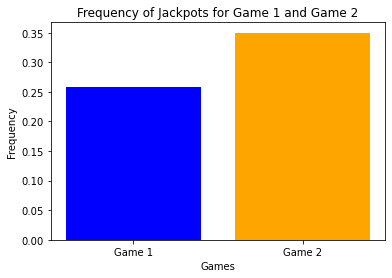

In [25]:
# Code blocks with output
import matplotlib.pyplot as plt 

coin1=Die(['H','T']) #fair
coin2=Die(['H','T']) #unfair
coin2.change_w('H', 5)

coin3=Die(['H','T']) #fair
coin4=Die(['H','T']) #fair
coin5=Die(['H','T']) #unfair
coin5.change_w('H', 7)

game1=Game([coin1, coin3, coin4])
game1.play(1000)
analyze1=Analyzer(game1)
freq1=(analyze1.jackpot())/1000
print(freq1)

game2=Game([coin2, coin5, coin3])
game2.play(1000)
analyze2=Analyzer(game2)
freq2=(analyze2.jackpot())/1000
print(freq2)

gamebar=['Game 1','Game 2']
y_axis = [freq1, freq2]
plt.bar(gamebar, y_axis, color = ['blue','orange'])
plt.title('Frequency of Jackpots for Game 1 and Game 2')

plt.xlabel("Games")
plt.ylabel("Frequency")


## Scenario 2

<AxesSubplot:xlabel='Die0,Die1,Die2,Die3,Die4'>

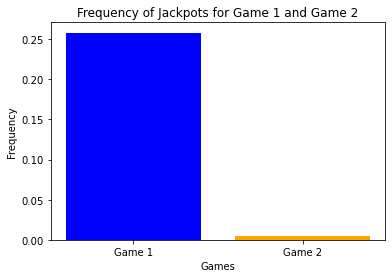

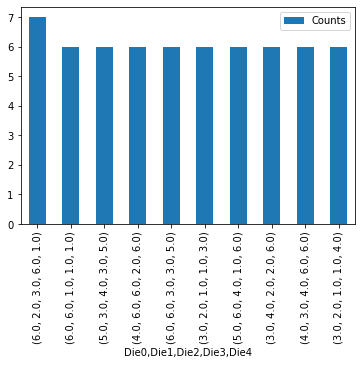

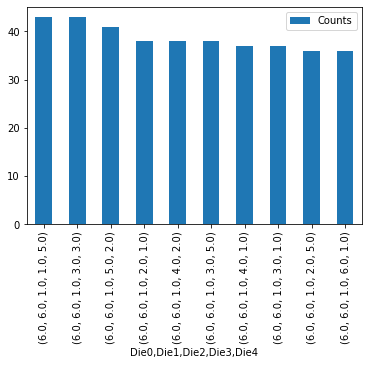

In [26]:
# Code blocks with output

die1=Die([1,2,3,4,5,6]) 
die2=Die([1,2,3,4,5,6])
die2.change_w(6,5)
die8=Die([1,2,3,4,5,6])
die8.change_w(6,5)

die3=Die([1,2,3,4,5,6])
die3.change_w(1,5)

die4=Die([1,2,3,4,5,6])
die5=Die([1,2,3,4,5,6])
die6=Die([1,2,3,4,5,6])
die7=Die([1,2,3,4,5,6])

game1=Game([die1, die4, die5, die6, die7])
game1.play(10000)
analyze1=Analyzer(game1)
freq2=(analyze2.jackpot())/1000

game2=Game([die2, die8, die3, die4, die5])
game2.play(10000)
analyze2=Analyzer(game2)
freq2=(analyze2.jackpot())/1000


gamebar=['Game 1','Game 2']
y_axis = [freq1, freq2]
plt.bar(gamebar, y_axis, color = ['blue','orange'])
plt.title('Frequency of Jackpots for Game 1 and Game 2')

plt.xlabel("Games")
plt.ylabel("Frequency")

s1=analyze1.combo().head(10)
s2=analyze2.combo().head(10)
s1.plot.bar()
s2.plot.bar()

## Scenario 3

In [27]:
# Code blocks with output
letters=['A','B','C','D','E','F','G','H','I',
         'J','K','L','M','N','O','P','Q','R',
         'S','T','U','V','W','X','Y','Z']
numbers=[8.4966, 2.0720, 4.5388, 3.3844, 11.1607, 
         1.8121, 2.4705, 3.0034, 7.5448, 0.1965, 1.1016,
         5.4893, 3.0129, 6.6544, 7.1635, 3.1671, 0.1962,
         7.5809, 5.7351, 6.9509, 3.6308, 1.0074, 1.2899,
         0.2902, 1.7779, 0.2722]

dielet=Die(letters)
for x in range(len(letters)):
    dielet.change_w(letters[x], numbers[x])
    
dielet2=Die(letters)
for x in range(len(letters)):
    dielet2.change_w(letters[x], numbers[x])
    
dielet3=Die(letters)
for x in range(len(letters)):
    dielet3.change_w(letters[x], numbers[x])
    
dielet4=Die(letters)
for x in range(len(letters)):
    dielet4.change_w(letters[x], numbers[x])
    
dielet5=Die(letters)
for x in range(len(letters)):
    dielet5.change_w(letters[x], numbers[x])


gamelet= Game([dielet,dielet2,dielet3,dielet4,dielet5])
gamelet.play(1000)
s3=gamelet.show()
words=list(s3.stack().groupby(level=0).apply(''.join))
wordlower=[i.lower() for i in words]

fivelet = pd.read_csv(r"C:\Users\Rhea\Documents\DS5100-2022-06-RA-\Project\sgb-words.txt",header=None)
fivelist=fivelet[0].tolist()

s3count=0
for i in wordlower:
    if i in fivelist:
        s3count += 1
    else: 
        pass
print(s3count)
print(s3count/1000)



1
0.001


# Directory Listing

A code block that executes the following bash command: 

```bash
!ls -lRF -o
```

In [28]:
!dir -lRF -o

 Volume in drive C is OS
 Volume Serial Number is 0433-B728

 Directory of C:\Users\Rhea\Documents\Final-Project


 Directory of C:\Users\Rhea\Documents\Final-Project



File Not Found


# Installation Output Listing
    
A code block that executes the code to install your your package and outputs a successful installation.

In [29]:
# Installation commands
! pip install .

Processing c:\users\rhea\documents\final-project
  Created wheel for Demo: filename=Demo-0.1-py3-none-any.whl size=8821 sha256=761ae77d839c66bb3650c8ff0320ce8428f2c9c1778dbb8f3c5c6aa384f9d23f
  Stored in directory: c:\users\rhea\appdata\local\pip\cache\wheels\9c\c8\ad\5eee5bef6ba41c1715be23989bce8f21c9dde16dc39a73fc0d
Successfully built Demo
  Attempting uninstall: Demo
    Found existing installation: Demo 0.1
    Uninstalling Demo-0.1:
      Successfully uninstalled Demo-0.1


In [30]:
from Demo.dieclass import Die
from Demo.gameclass import Game
from Demo.analyzerclass import Analyzer